**Network Analysis of Facebook Large Dataset**

In [3]:
# Step 1: Install and Import Required Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms.community import greedy_modularity_communities

In [4]:
# Step 2: Load the Dataset
# Update file path if using Google Colab
edges_df = pd.read_csv('musae_facebook_edges.csv')
large_df = pd.read_csv('facebook_large.csv')
G = nx.from_pandas_edgelist(edges_df, source='id_1', target='id_2')

In [5]:
# Load node attributes (pages types)
node_attributes = large_df.set_index('id')[['page_name', 'page_type']].to_dict('index')
nx.set_node_attributes(G, node_attributes)

# Display the first five rows
edges_df.head(), large_df.head()


(   id_1   id_2
 0     0  18427
 1     1  21708
 2     1  22208
 3     1  22171
 4     1   6829,
    id             facebook_id                                      page_name  \
 0   0     145,647,315,578,475                       The Voice of China 中国好声音   
 1   1         191,483,281,412                  U.S. Consulate General Mumbai   
 2   2     144,761,358,898,518                                           ESET   
 3   3     568,700,043,198,473   Consulate General of Switzerland in Montreal   
 4   4   1,408,935,539,376,130              Mark Bailey MP - Labor for Miller   
 
     page_type  
 0      tvshow  
 1  government  
 2     company  
 3  government  
 4  politician  )

In [6]:
# Check for missing values
print("Missing values:\n", edges_df.isnull().sum())
print("Missing values in large :\n", large_df.isnull().sum())

Missing values:
 id_1    0
id_2    0
dtype: int64
Missing values in large :
 id               0
 facebook_id     0
page_name        0
page_type        0
dtype: int64


In [7]:
# Network Statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
largest_component = max(nx.connected_components(G), key=len)
largest_component_size = len(largest_component)
clustering_coefficient = nx.average_clustering(G)

stats = {
    'Total Nodes': num_nodes,
    'Total Edges': num_edges,
    'Average Degree': avg_degree,
    'Network Density': density,
    'Largest Component Size': largest_component_size,
    'Average Clustering Coefficient': clustering_coefficient
}
stats


{'Total Nodes': 22470,
 'Total Edges': 171002,
 'Average Degree': 15.220471740097908,
 'Network Density': 0.000677398715568023,
 'Largest Component Size': 22470,
 'Average Clustering Coefficient': 0.3597383824426942}

In [8]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=100)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)

top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

{'Top Betweenness Centrality': top_betweenness, 'Top Eigenvector Centrality': top_eigenvector}

{'Top Betweenness Centrality': [(701, 0.11949092720334413),
  (11003, 0.0820581799375244),
  (19743, 0.03644124599614159),
  (21729, 0.034025507902130166),
  (11158, 0.02838733743030904),
  (21120, 0.02569192931234774),
  (8482, 0.02318501394216652),
  (22171, 0.02269551474760911),
  (5049, 0.022119006725882046),
  (17983, 0.021191140733387306)],
 'Top Eigenvector Centrality': [(16895, 0.17781707337310618),
  (14497, 0.16061001208256728),
  (1387, 0.13635222410071537),
  (2442, 0.12104428239701732),
  (8139, 0.12083968693763034),
  (19743, 0.11706026233850285),
  (21729, 0.11584286287283624),
  (4502, 0.11376368244597415),
  (15236, 0.10815449185206008),
  (9220, 0.10642511189041222)]}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [10]:

# Function to plot degree distribution
def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    plt.figure(figsize=(10, 6))
    plt.hist(degree_sequence, bins=50, log=True, edgecolor="black")
    plt.xlabel("Degree (Number of Connections)")
    plt.ylabel("Frequency (Log Scale)")
    plt.title("Degree Distribution of Facebook Pages Network")
    plt.grid(True)
    plt.show()

In [11]:
# Function to plot network structure (for a sample to reduce complexity)
def plot_network_structure(G, title="Network Visualization", sample_size=500):
    sampled_nodes = list(dict(G.degree()).keys())[:sample_size]  # Take a subset of nodes for efficiency
    subgraph = G.subgraph(sampled_nodes)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw_networkx_nodes(subgraph, pos, node_size=10, node_color="blue", alpha=0.7)
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
    plt.title(title)
    plt.show()

In [12]:
# 1. Most Influential Nodes - Centrality Measures
def analyze_central_nodes(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, k=100)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)

    # Top 10 nodes for each centrality measure
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    return {
        "Top Degree Centrality": top_degree,
        "Top Betweenness Centrality": top_betweenness,
        "Top Eigenvector Centrality": top_eigenvector
    }

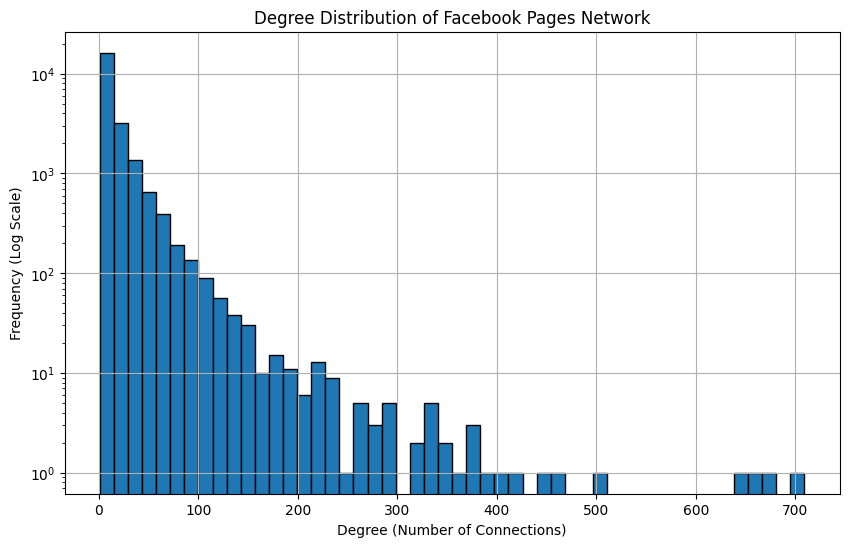

In [13]:
# 2. Degree Distribution
plot_degree_distribution(G)

<ipython-input-14-ee95ad4e4648>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=page_type_counts.index, y=page_type_counts.values, palette="viridis")


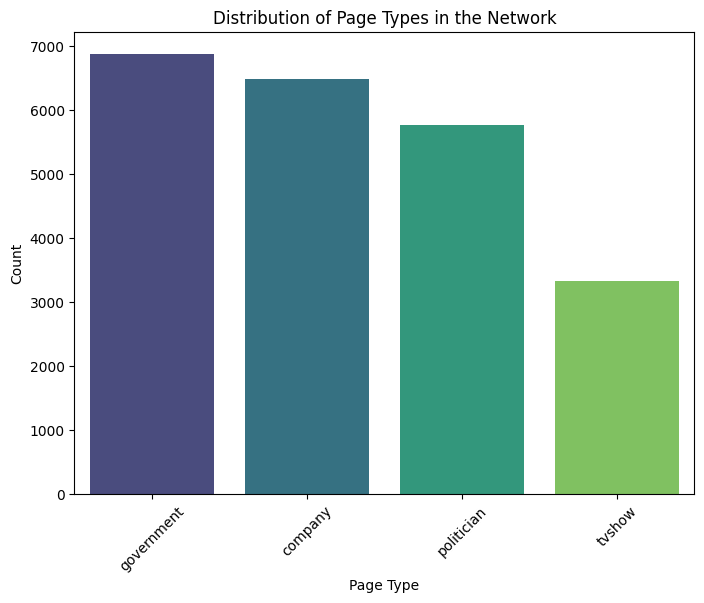

In [14]:
# 3. Page Type Distribution
page_type_counts = large_df["page_type"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=page_type_counts.index, y=page_type_counts.values, palette="viridis")
plt.xlabel("Page Type")
plt.ylabel("Count")
plt.title("Distribution of Page Types in the Network")
plt.xticks(rotation=45)
plt.show()

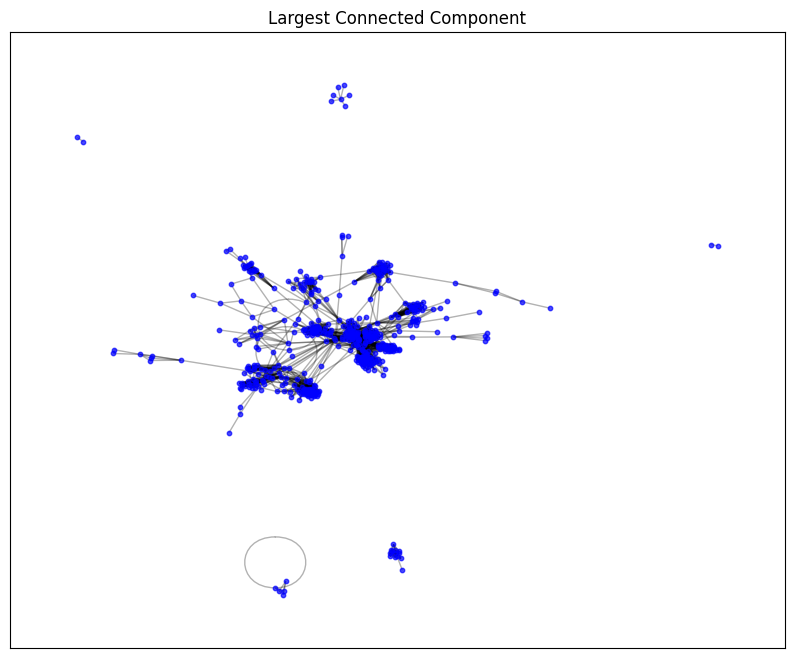

In [15]:
# 4. Largest Connected Component
largest_component_nodes = max(nx.connected_components(G), key=len)
subgraph_largest_component = G.subgraph(largest_component_nodes)
plot_network_structure(subgraph_largest_component, "Largest Connected Component")

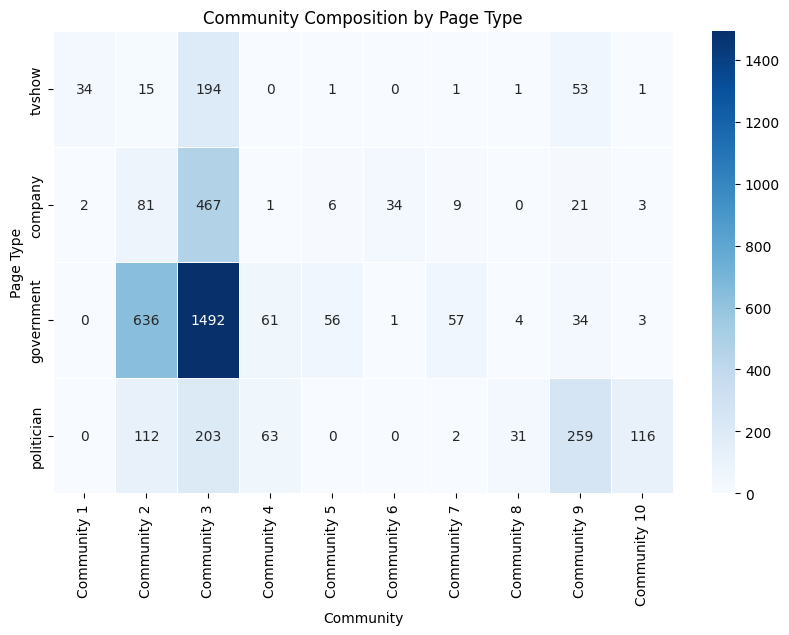

In [16]:
# 5. Community Detection & Structure
lpa_communities = list(nx.community.asyn_lpa_communities(G))
num_communities_lpa = len(lpa_communities)
community_sizes_lpa = sorted([len(c) for c in lpa_communities], reverse=True)[:10]

# Community composition visualization
community_page_type_counts = {}
for i, community in enumerate(lpa_communities[:10]):
    community_types = [node_attributes[node]["page_type"] if node in node_attributes else "Unknown" for node in community]
    community_page_type_counts[f"Community {i+1}"] = dict(Counter(community_types))

community_page_type_df = pd.DataFrame(community_page_type_counts).fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(community_page_type_df, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.xlabel("Community")
plt.ylabel("Page Type")
plt.title("Community Composition by Page Type")
plt.show()


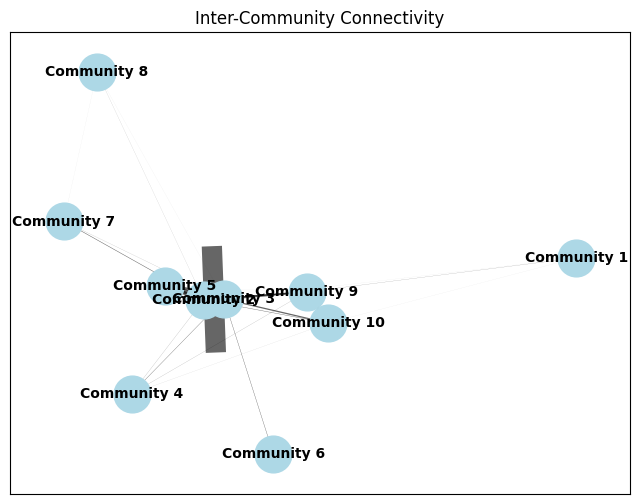

In [17]:
# 6. Inter-Community Connectivity
community_graph = nx.Graph()
node_to_community = {node: f"Community {i+1}" for i, community in enumerate(lpa_communities[:10]) for node in community}

for edge in G.edges():
    if edge[0] in node_to_community and edge[1] in node_to_community:
        comm1, comm2 = node_to_community[edge[0]], node_to_community[edge[1]]
        if comm1 != comm2:
            if community_graph.has_edge(comm1, comm2):
                community_graph[comm1][comm2]["weight"] += 1
            else:
                community_graph.add_edge(comm1, comm2, weight=1)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(community_graph, seed=42)
edges, weights = zip(*nx.get_edge_attributes(community_graph, "weight").items())

nx.draw_networkx_nodes(community_graph, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(community_graph, pos, edgelist=edges, width=[w / 50 for w in weights], alpha=0.6)
nx.draw_networkx_labels(community_graph, pos, font_size=10, font_weight="bold")
plt.title("Inter-Community Connectivity")
plt.show()


In [18]:
# 7. Network Density
network_density = nx.density(G)
print(f"Network Density: {network_density} (Sparse Network)")

Network Density: 0.000677398715568023 (Sparse Network)


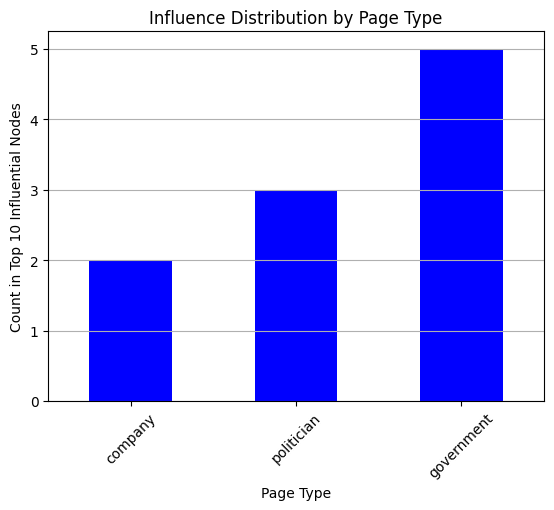

In [19]:
# 8. Most Influential Page Types
top_degree_nodes = [node for node, _ in analyze_central_nodes(G)["Top Betweenness Centrality"]]
top_page_types = [node_attributes[node]["page_type"] if node in node_attributes else "Unknown" for node in top_degree_nodes]
top_page_type_counts = Counter(top_page_types)

# Convert to DataFrame for visualization
top_page_type_df = pd.DataFrame.from_dict(top_page_type_counts, orient="index", columns=["Count"])
top_page_type_df.plot(kind="bar", legend=False, color=["blue", "green", "red"])
plt.xlabel("Page Type")
plt.ylabel("Count in Top 10 Influential Nodes")
plt.title("Influence Distribution by Page Type")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


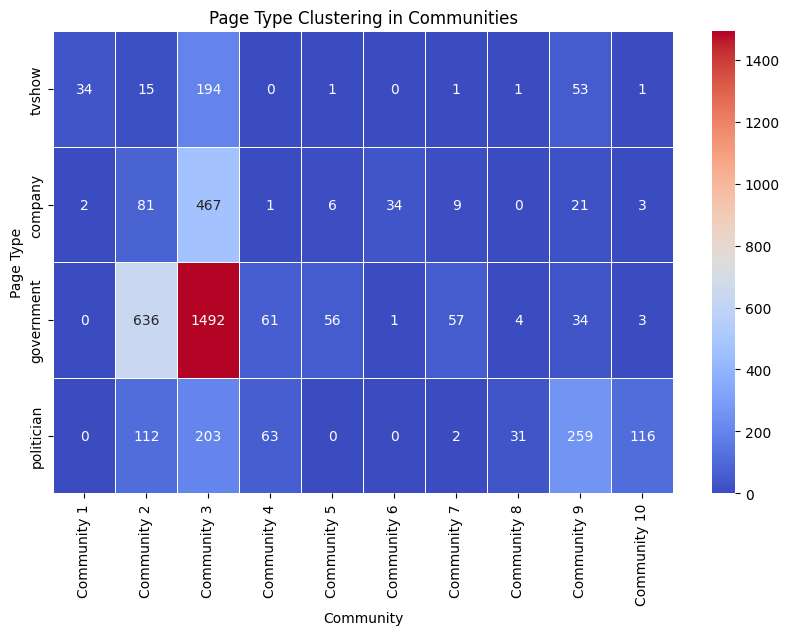

In [20]:
# 9. Page Type Clustering in Communities
plt.figure(figsize=(10, 6))
sns.heatmap(community_page_type_df, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Community")
plt.ylabel("Page Type")
plt.title("Page Type Clustering in Communities")
plt.show()

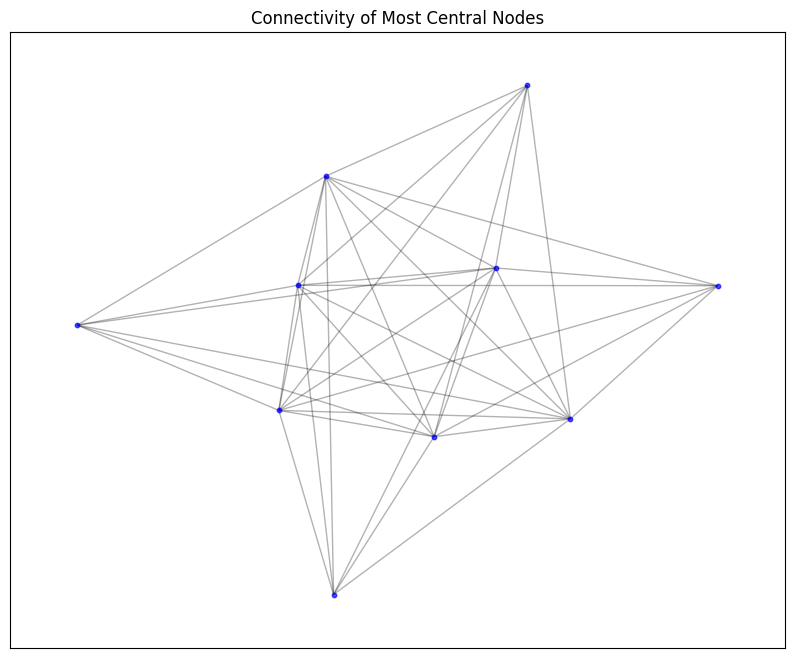

In [21]:
# 10. Connectivity of Most Central Nodes
top_central_nodes = [node for node, _ in analyze_central_nodes(G)["Top Eigenvector Centrality"]]
subgraph_central_nodes = G.subgraph(top_central_nodes)

plot_network_structure(subgraph_central_nodes, "Connectivity of Most Central Nodes")

Community Detection Results:
    Node    Industry  Degree  Community
0      0      tvshow       1          0
1  18427      tvshow      51          0
2      1  government      34          1
3  21708  government     195          1
4  22208  government     205          1


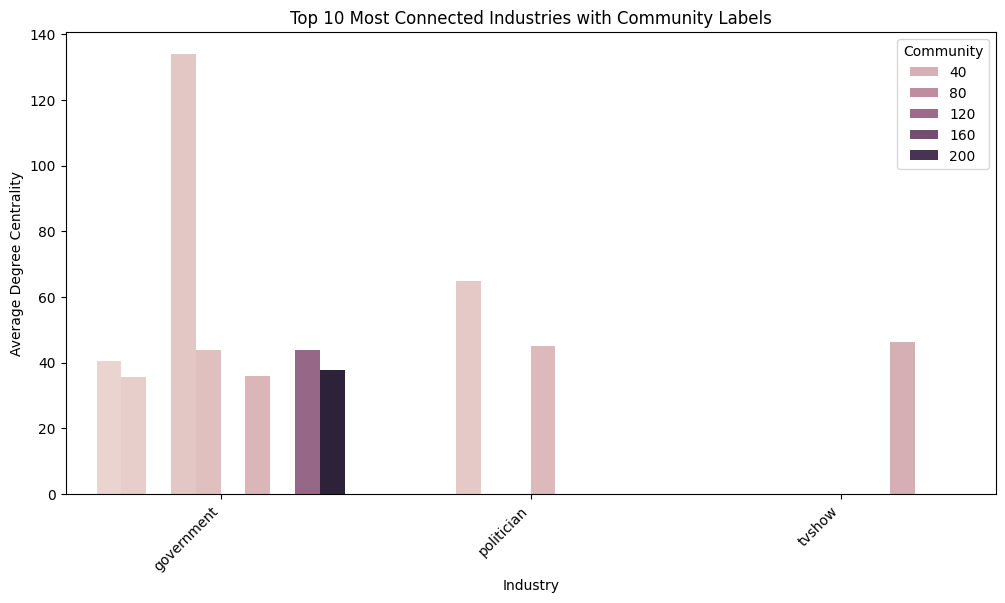

Top Influential Nodes per Community:
                  Node    Industry  Degree  Community
Community                                            
0         1      18427      tvshow      51          0
          12452   8762      tvshow      20          0
          11555  17807      tvshow      15          0
1         15     10379  government     468          1
          5      22171  government     330          1
...                ...         ...     ...        ...
1417      22455  21063     company       1       1417
1418      22272  17074  government       3       1418
          22274  19227  government       2       1418
          22273  18211  government       1       1418
1419      22307  18360     company       4       1419

[3750 rows x 4 columns]


<ipython-input-22-889154cb3878>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_nodes_per_community = centrality_df.groupby("Community").apply(lambda x: x.nlargest(3, "Degree"))


In [22]:
from networkx.algorithms.community import label_propagation_communities

# Perform fast community detection using Label Propagation
communities = list(label_propagation_communities(G))
community_dict = {node: i for i, community in enumerate(communities) for node in community}

# Load node attributes (pages types)
# This line was missing or not executed correctly
node_attributes = large_df.set_index('id')[['page_name', 'page_type']].to_dict('index')

# Create centrality DataFrame (Assuming 'Node', 'Industry', 'Degree' are relevant columns)
# Replace with your actual centrality data
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        'Node': node,
        'Industry': node_attributes.get(node, {}).get('page_type', 'Unknown'),  # Get industry from node attributes
        'Degree': G.degree(node)
    })
centrality_df = pd.DataFrame(centrality_data)

# Add community labels to the centrality DataFrame
centrality_df["Community"] = centrality_df["Node"].map(community_dict)

# Display detected communities
# Instead of tools.display_dataframe_to_user, display the dataframe directly
print("Community Detection Results:")  # Print a header
print(centrality_df.head())  # Print the head of the DataFrame

# Aggregate by industry and community
industry_community = centrality_df.groupby(["Industry", "Community"])["Degree"].mean().reset_index()
industry_community = industry_community.nlargest(10, "Degree")

# Plot Top 10 Most Connected Industries with Community Labels
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_community, x="Industry", y="Degree", hue="Community", dodge=True)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Industry")
plt.ylabel("Average Degree Centrality")
plt.title("Top 10 Most Connected Industries with Community Labels")
plt.legend(title="Community")
plt.show()

# Identify Most Influential Nodes in Each Community
top_nodes_per_community = centrality_df.groupby("Community").apply(lambda x: x.nlargest(3, "Degree"))
# Instead of tools.display_dataframe_to_user, display the dataframe directly
print("Top Influential Nodes per Community:")  # Print a header
print(top_nodes_per_community)  # Print the DataFrame